In [10]:
import pandas as pd
import numpy as np 
import re
import pickle

import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()

# # used for better images in medium article
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

In [2]:
train = pd.read_csv('data/train_skills.csv', error_bad_lines = True)
train.info()
                   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5700 entries, 0 to 5699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   phrase  5700 non-null   object 
 1   skill   5698 non-null   float64
dtypes: float64(1), object(1)
memory usage: 89.2+ KB


In [3]:
# I didn't label 0's for a small portion and will fill with 0 now
train.fillna(0, inplace = True)
train.skill = train.skill.astype('int8')
# 130 duplicates identified in the df
train.drop_duplicates('phrase', inplace = True)
# lower case can be excluded however many of the data gathered were already lowercase
# therefore a complete overhaul of the data is necessary for cased phrases
# but am assuming it will not make a considerable difference
train['phrase'] = train.phrase.str.lower()
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5572 entries, 0 to 5698
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   phrase  5572 non-null   object
 1   skill   5572 non-null   int8  
dtypes: int8(1), object(1)
memory usage: 92.5+ KB


### Char count

In [4]:
# maximum characters/ string length of an observation within the df
char_count = train.phrase.map(len)
char_count.max()

99

In [5]:
# I am curious to see what this max char observation looks like
index = train.phrase.loc[char_count == 99].index
print(train.phrase.iloc[index[0]])

mba lean sigma expertise pmp project management certification retail e-commerce industry experience


In [6]:
# char count stats
char_count.describe()

count    5572.000000
mean       14.988514
std         8.505621
min         1.000000
25%         9.000000
50%        14.000000
75%        20.000000
max        99.000000
Name: phrase, dtype: float64

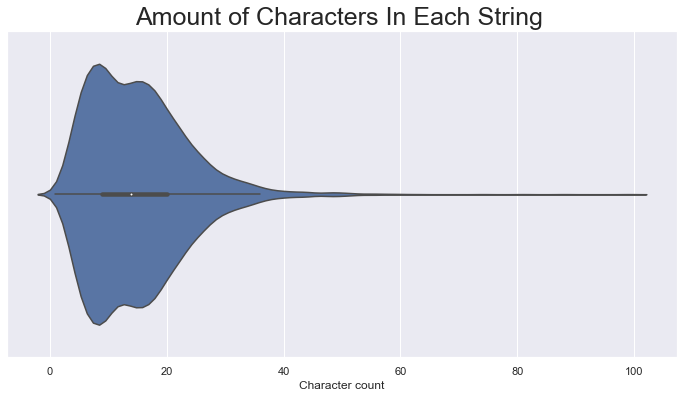

In [7]:
plt.figure(figsize = (12,6))
sns.violinplot(char_count)
plt.title('Amount of Characters In Each String ', size = 25)
plt.xlabel('Character count');

### Word Count

In [5]:
train.phrase.iloc[979:1000]

979                               java , python ,
980                            related experience
981                                         shape
982                            predictive science
983                                       mankind
984                               software vendor
985                                     of issues
986                                   willingness
987                                          word
988                                transformation
989                          verbal communication
990                                          yaml
991                                buying analyze
992                            the implementation
993                             regular full-time
994                                           sas
995                                   senior data
996                                       results
997    route optiumization , demand forecasting ,
998                                      validate


In [8]:
# the strings are broken up in to elements/ tokenized
tokenized = train.phrase.str.split(' ')
train['tokenized'] = tokenized

# the maximimum amount of words in a phrase
word_count = train.tokenized.map(len)
word_count.max()

12

In [9]:
# curious about this obs also and assumed there would be numerous commas however there are only 2
index = train.tokenized.loc[word_count == 12].index
print(train.tokenized.iloc[index[0]])

['process', 'master', 'performance', 'measurement', 'methods', 'control', 'charts', ',', 'pareto', 'charts', ',', 'diagrams']


In [10]:
# word_count stats
word_count.describe()

count    5572.000000
mean        1.683417
std         1.037404
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        12.000000
Name: tokenized, dtype: float64

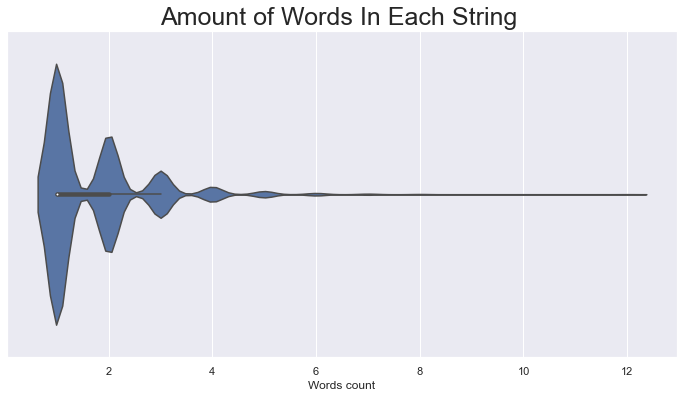

In [11]:
plt.figure(figsize = (12,6))
sns.violinplot(word_count)
plt.title('Amount of Words In Each String ', size = 25)
plt.xlabel('Words count');

# Skills - Target Class Balance

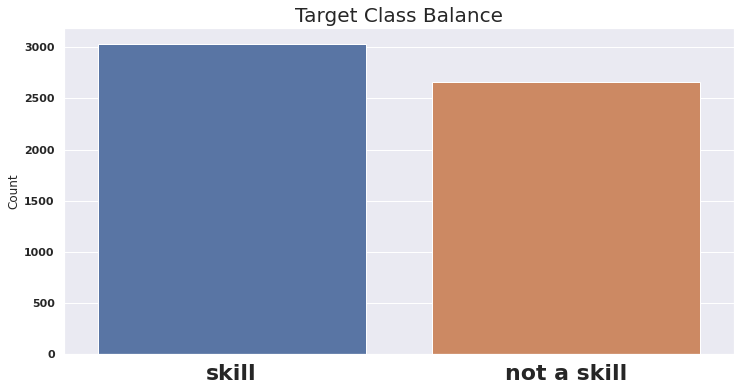

In [15]:
plt.figure(figsize = (12,6))
train['skill_cat'] = np.where(train.skill == 1, 'skill', 'not a skill')
vbar_skill = sns.barplot(x = train.skill_cat.value_counts().index, y = train.skill_cat.value_counts())
plt.title('Target Class Balance', size = 20)
vbar_skill.set_xticklabels(vbar_skill.get_xticklabels(), fontsize = 22);
plt.ylabel('Count');
plt.savefig('target_balance.png', dpi = 400)

In [13]:
# ratio of target class balance
train.skill.sum() / len(train.skill)

0.5464824120603015